# Loan Status Predection.

## Introduction

### In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals, organizations etc. The recipient (i.e., the borrower) incurs a debt and is usually liable to pay interest on that debt until it is repaid as well as to repay the principal amount borrowed. (wikipedia)

## The major aim of this notebook is to predict which of the customers will have their loan approved.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
data = pd.read_csv("/home/sunny/Documents/Datasets/LoanData.csv")
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


## This dataset is named Loan Prediction Dataset dataset. The dataset contains a set of 613 records under 13 attributes :- 
### Loan_ID ----- A Unique Loan ID's. 
### Gender ----- Male/Female.
### Married ----- Married (Yes) / Not Married (No).
### Dependents ----- No Of Person Depends On Clients.
### Education ----- Applicant Education (Graduate / Undergraduate). 
### Self_Employed ----- A Person Is Self-Employed (Yes / No). 
### ApplicantIncome ----- Applicant Income. 
### CoapplicantIncome ----- CoapplicantIncome. 
### LoanAmount ----- Loan Amount In Thousands.
### Loan_Amount_Term ----- term of loan in months.  
### Credit_History ----- Credit History Meet Guidelines. 
### Property_Area ----- Urban/Semi And Rural. 
### Loan_Status ----- Loan Approved (Y / N)
     

## The main objective for this dataset Is To Predict loan status using machine learning Techniques.

### Target feature : - Loan_Status


In [3]:
# basic information about the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# statistical information about the dataset.
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.describe(include = "object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [6]:
# lets check target value
data['Loan_Status'].value_counts()
# we have an inbalanced data in  this feature .

Y    422
N    192
Name: Loan_Status, dtype: int64

## Data Cleaning

In [7]:
# null values in the dataset.
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

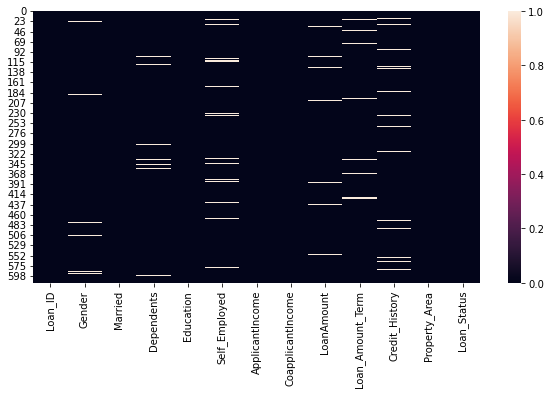

In [8]:
plt.figure(figsize = (10,5))
sns.heatmap(data.isnull())

#### SO HERE WE WILL FILL THE NULL VALUES WITH MEAN IN NUMERICALS COLUMNS AND IN CATEGORICAL COLUMNS WE WILL FILL NULL VALUES WITH MODE.

In [9]:
# extracting the categorical features.
cat_features = data.select_dtypes(include = "object")
cat_features.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
# filling null values with mode in categorical features
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [11]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# extracting the numericals features.
numeric_features = data.select_dtypes(exclude = "object")
numeric_features.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [13]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [14]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Outliers Detection & Handling

/home/sunny/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/sunny/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/sunny/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


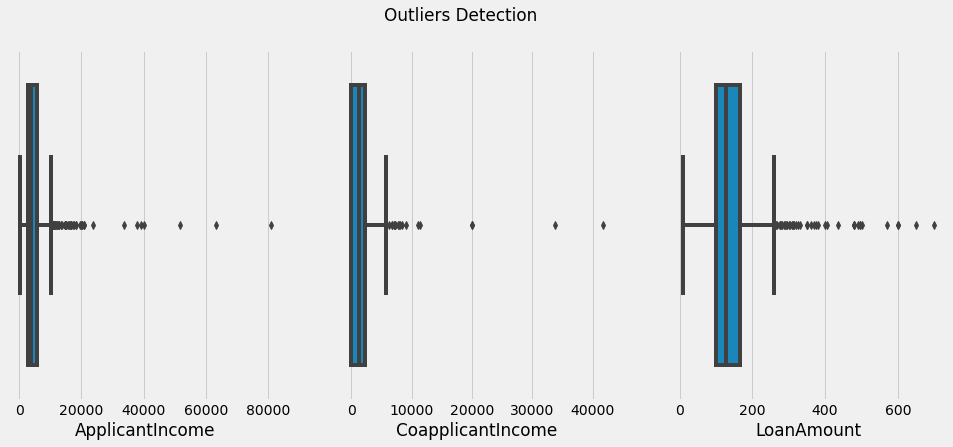

In [15]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'])

plt.suptitle("Outliers Detection")
plt.show()


### OBSERVATIONS:- 
#### In APPLICANTINCOME we can see that most of the person have their income between 0 to 25000. So to handle the outlier i will simply remove the data where APPLICANTINCOME is greater than the 25000.
#### In COAPPLICANTINCOME we can see that most of the person have their income between 0 to 12000. So to handle the outlier i will simply remove the data where COAPPLICANTINCOME is greater than the 12000.
#### In LOANAMOUNT we can see that most of the person who wants loan amount lies between 0 to 400. So to handle the outlier i will simply remove the data where LOANAMOUNT is greater than the 400.



In [16]:
print("Before Removing the outliers", data.shape)

data = data[data['ApplicantIncome']<25000]

print("After Removing the outliers", data.shape)

Before Removing the outliers (614, 13)
After Removing the outliers (607, 13)


In [17]:
print("Before Removing the outliers", data.shape)

data = data[data['CoapplicantIncome']<12000]

print("After Removing the outliers", data.shape)


Before Removing the outliers (607, 13)
After Removing the outliers (603, 13)


In [18]:
print("Before Removing the outliers", data.shape)

data = data[data['LoanAmount']<400]

print("After Removing the outliers", data.shape)

Before Removing the outliers (603, 13)
After Removing the outliers (591, 13)


### After Removing The null Values And Outliers We have 591 Person's Data As A Finall Data.

## Exploratory Data Analysis.

/home/sunny/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sunny/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sunny/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

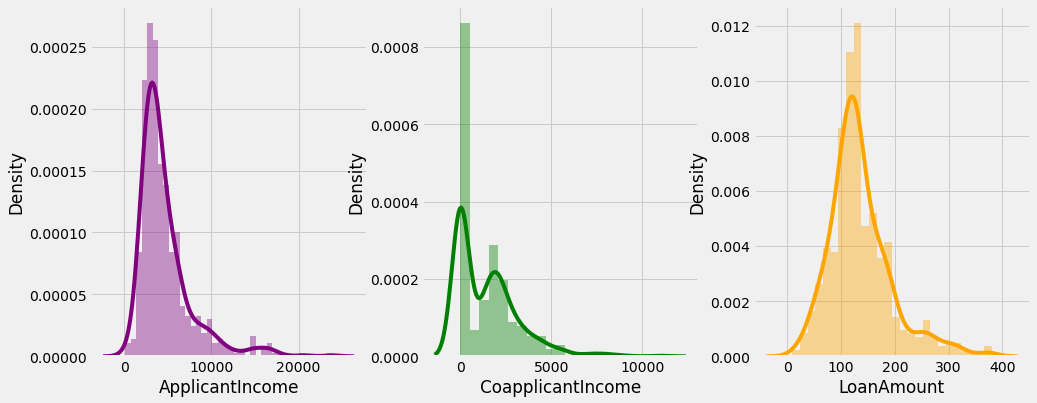

In [19]:
# lets check the distribution of the column in which we have handle the outliers.
plt.subplot(1, 3, 1)
sns.distplot(data['ApplicantIncome'], color = 'purple')

plt.subplot(1, 3, 2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1, 3, 3)
sns.distplot(data['LoanAmount'], color = 'orange')

## OBSERVATION:--
#### IN APPLICANTINCOME WE CAN SEE THAT THERE IS SOME SKEWNESS .
#### IN COAPPLICANTINCOME THERE IS ALSO A SKEWNESS.

### so i will use LOG TRANSFORMATION to remove this skewness.

/home/sunny/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sunny/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sunny/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

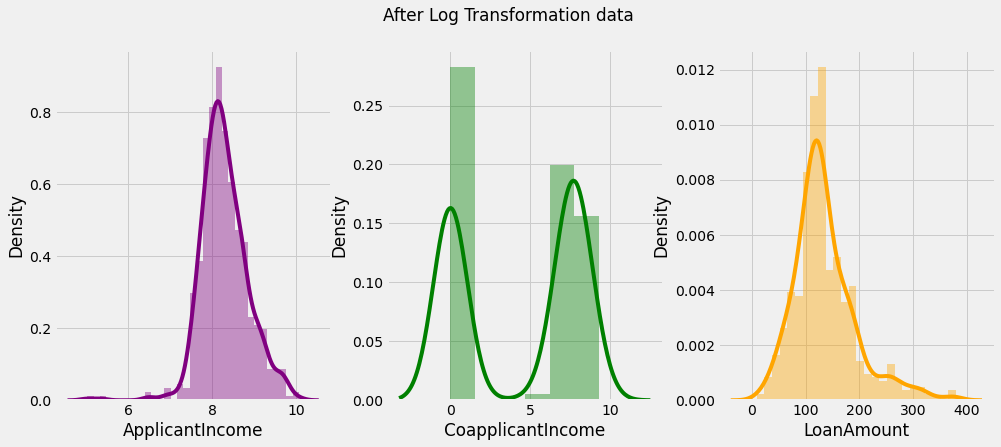

In [20]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

plt.subplot(1, 3, 1)
sns.distplot(data['ApplicantIncome'], color = 'purple')

plt.subplot(1, 3, 2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1, 3, 3)
sns.distplot(data['LoanAmount'], color = 'orange')

plt.suptitle("After Log Transformation data")
plt.show()

In [24]:
cat = cat_features.columns.to_list()

In [23]:
num = numeric_features.columns.to_list()

In [25]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

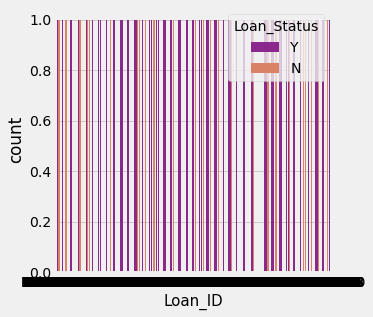

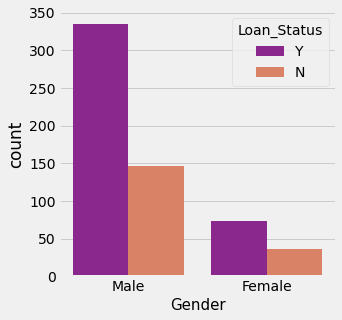

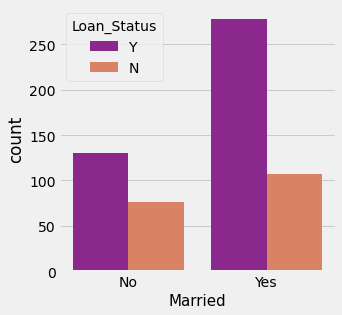

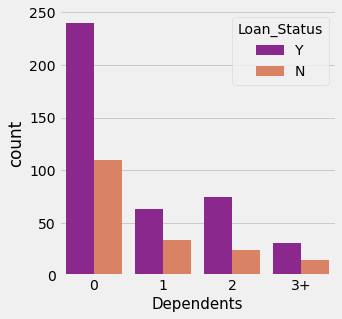

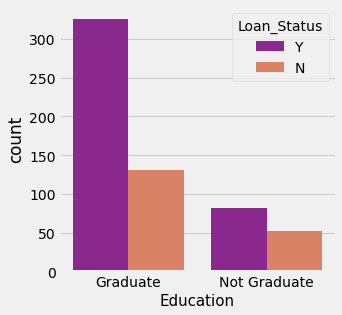

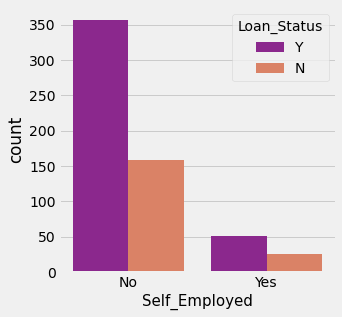

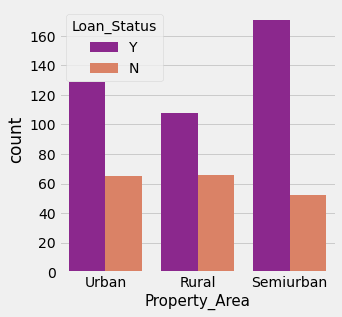

In [28]:
for i in cat[:-1]:
    plt.figure(figsize = (15,10))
    plt.subplot(2,3,1)
    sns.countplot(x =i, hue = 'Loan_Status', data = data, palette = 'plasma' )
    plt.xlabel(i, fontsize = 15)

In [29]:
# lets check categorical column with target column
print(pd.crosstab(data['Loan_Status'], data['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [30]:
# lets check categorical column with target column
print(pd.crosstab(data['Loan_Status'], data['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [31]:
# lets check categorical column with target column
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [32]:
# lets check categorical column with target column
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


## Data Preprocessing

In [37]:
# first let make the copy of the original dataset
loan_data = data.copy()

In [35]:
loan_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y


In [38]:
# removing the unnecessary column from the dataset
loan_data = loan_data.drop(['Loan_ID'], axis = 1)

In [39]:
loan_data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y


In [40]:
# converting categorical column to numeric
loan_data['Gender'] = loan_data['Gender'].replace(('Male', 'Female'),(1,0))
loan_data['Married'] = loan_data['Married'].replace(('Yes', 'No'),(1,0))
loan_data['Education'] = loan_data['Education'].replace(('Graduate', 'Not Graduate'),(1,0))

In [41]:
loan_data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,1,1,1,1,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,1,1,0,1,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,1,1,0,0,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,1,0,0,1,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [42]:
loan_data['Self_Employed'] = loan_data['Self_Employed'].replace(('Yes', 'No'),(1,0))
loan_data['Loan_Status'] = loan_data['Loan_Status'].replace(('Y', 'N'),(1,0))
loan_data['Property_Area'] = loan_data['Property_Area'].replace(('Urban', 'Semiurban','Rural'),(1,1,0))

loan_data['Dependents'] = loan_data['Dependents'].replace(('0', '1','2', '3+'),(0,1,1,1))

In [43]:
loan_data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


### Splitting The Dataset Into Independent And Dependent Variable

In [44]:
X = loan_data.drop(['Loan_Status'], axis = 1)
y = loan_data['Loan_Status']

In [46]:
print(X.shape)
print()
print("#*#*#*#*#*#*#*#*#*#*#*#")
print()
print(y.shape)

(591, 11)

#*#*#*#*#*#*#*#*#*#*#*#

(591,)


### Handle Imbalance data

In [50]:
# we have seen that in some column we have imbalance data so we will handle that imbalance data.
#import required libraries
from imblearn.over_sampling import SMOTE
# i will use SMOTE 

In [52]:
x_rasmple, y_rasmple = SMOTE().fit_resample(X, y.values.ravel())

In [53]:
print(x_rasmple.shape)
print()
print(y_rasmple.shape)

(816, 11)

(816,)


### Train test Split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train,y_test = train_test_split(x_rasmple, y_rasmple, test_size = 0.2, random_state = 0)

In [56]:
print(X_train.shape)
print()
print(X_test.shape)
print()
print(y_train.shape)
print()
print(y_test.shape)

(652, 11)

(164, 11)

(652,)

(164,)


## Model Building

### Now Our Dataset Has Been Ready For The Model Building.

### For This Project I Will Be Using Logistic Regression Machine Learning Algorithm.

In [57]:
from sklearn.linear_model import LogisticRegression

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
LR = LogisticRegression()
LR.fit(X_train , y_train)

/home/sunny/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_pred = LR.predict(X_test)

In [65]:
# lets check the accuracy for our model on traing and testing dataset
print("Traning Accuracy", LR.score(X_train, y_train))
print("Test Accuracy", LR.score(X_test, y_test))

Traning Accuracy 0.7837423312883436
Test Accuracy 0.7865853658536586


In [66]:
# creating classification report
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77        82
           1       0.74      0.88      0.80        82

    accuracy                           0.79       164
   macro avg       0.80      0.79      0.78       164
weighted avg       0.80      0.79      0.78       164



In [68]:
# final accuracy of the model
print("Our Model Accuracy is",accuracy_score(y_pred, y_test) )

Our Model Accuracy is 0.7865853658536586


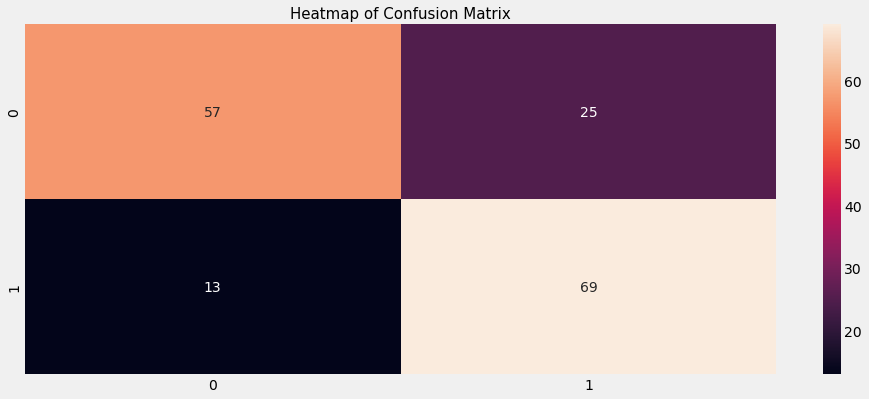

In [80]:
# lets create a confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

## Model Predections

In [73]:
customer_1 = np.array([[1,1,1, 1, 1,3924, 1733, 148.0, 360, 1.0, 1 ]])

In [76]:
prediction = LR.predict(customer_1)
print(prediction[0])

1


### The model Have Predict That Customer 1 Loan Have been approved.

In [77]:
customer_2 = np.array([[0,1,0, 1, 0,3924, 1733, 148.0, 360, 1.0, 0 ]])

In [78]:
prediction = LR.predict(customer_2)
print(prediction[0])

1


### The model Have Predict That Customer 2 Loan Have been approved.